<a href="https://colab.research.google.com/github/germanh1206/Backend/blob/main/Intento_echoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R


Resultados MLP:
    Neurona(s)  Capas  Precisión
0            1      1   0.488095
1            1      2   0.488095
2            2      1   0.642857
3            2      2   0.488095
4            3      1   0.702381
5            3      2   0.702381
6            4      1   0.488095
7            4      2   0.666667
8            5      1   0.797619
9            5      2   0.488095
10           6      1   0.750000
11           6      2   0.785714
12           7      1   0.761905
13           7      2   0.738095
14           8      1   0.785714
15           8      2   0.690476
16           9      1   0.809524
17           9      2   0.821429
18          10      1   0.750000
19          10      2   0.714286

Resultados SVM:
    Kernel      C  Precisión
0   linear    0.1   0.702381
1   linear    1.0   0.797619
2   linear   10.0   0.869048
3   linear  100.0   0.857143
4     poly    0.1   0.857143
5     poly    1.0   0.821429
6     poly   10.0   0.809524
7     poly  100.0   0.833333
8      rbf  

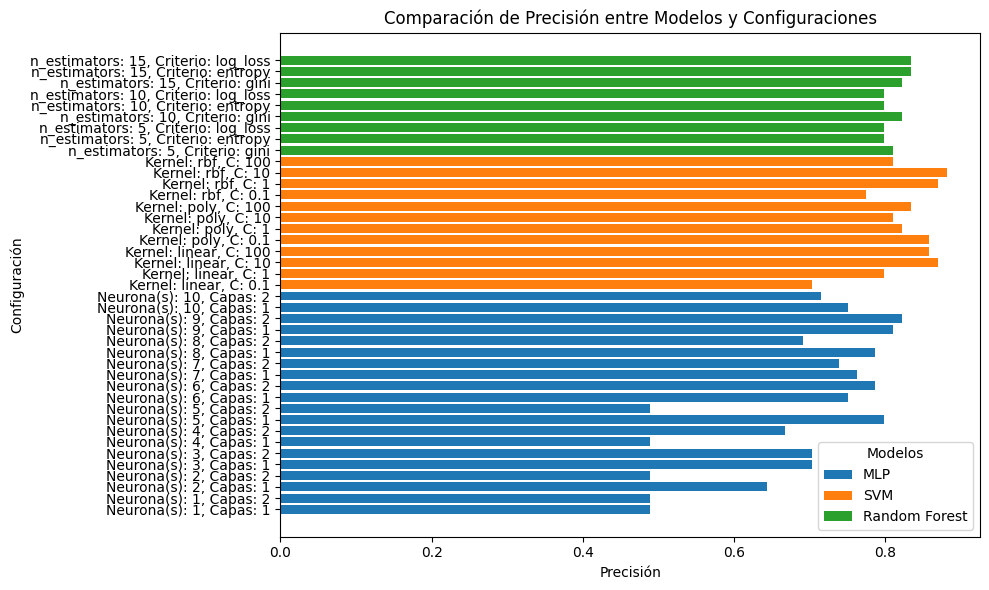

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Matriz normalizada


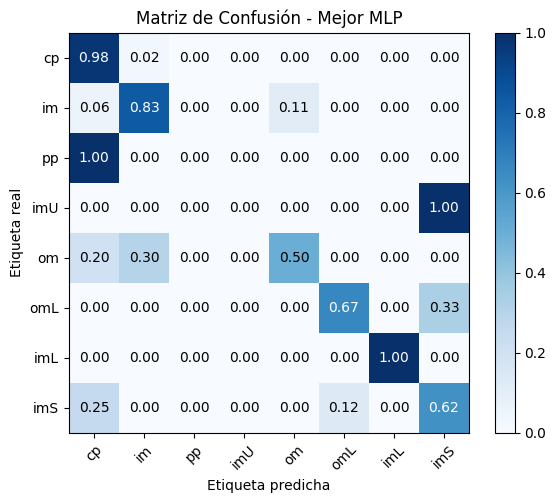

Matriz normalizada


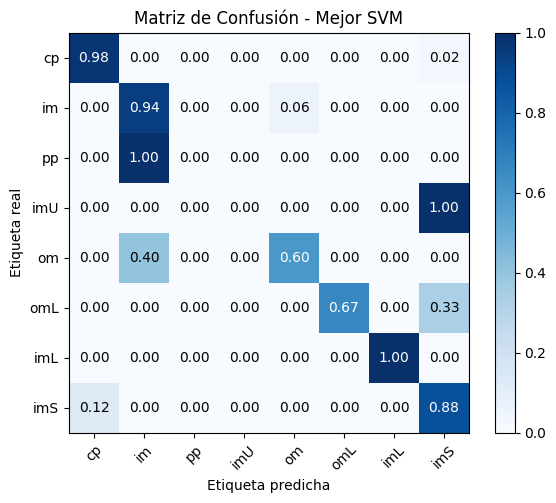

Matriz normalizada


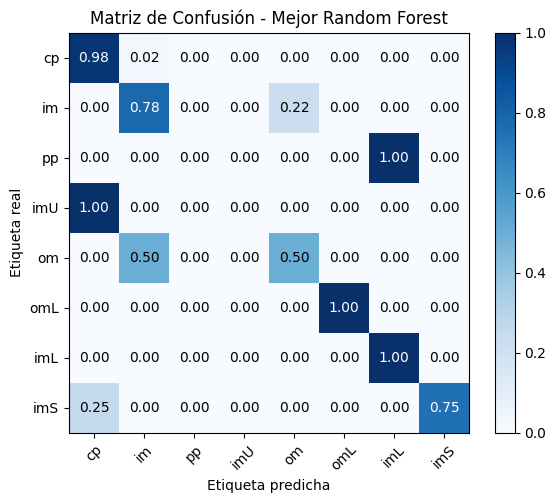

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar datos
data_ecoli = pd.read_csv("ecoli.csv", sep='\s+', header=0,
                         names=['ID','v1','v2','v3','v4','v5','v6','v7','label'])

y = data_ecoli['label']
y_onehot = pd.get_dummies(y)
X = data_ecoli.drop(columns=['ID', 'label'])

# Dividir datos
X_train, X_test, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.25, random_state=0)
_, _, y_train_onehot, y_test_onehot = train_test_split(X, y_onehot, test_size=0.25, random_state=0)

# Clases
classes = ["cp", "im", "pp", "imU", "om", "omL", "imL", "imS"]

# ---------------------
# 1. MLP
# ---------------------
mlp_results = []
for hidden_layer_size in range(1, 11):
    for num_layers in [1, 2]:
        mlp = MLPClassifier(
            solver='lbfgs',
            alpha=1e-5,
            hidden_layer_sizes=(hidden_layer_size,) * num_layers,
            random_state=1
        )
        mlp.fit(X_train, y_train_onehot)
        y_pred = mlp.predict(X_test)
        acc = accuracy_score(y_test_onehot.values.argmax(axis=1), y_pred.argmax(axis=1))
        mlp_results.append((hidden_layer_size, num_layers, acc))

# ---------------------
# 2. SVM
# ---------------------
svm_results = []
for kernel in ['linear', 'poly', 'rbf']:
    for C in [0.1, 1, 10, 100]:
        model = svm.SVC(kernel=kernel, C=C)
        model.fit(X_train, y_train_orig)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test_orig, pred)
        svm_results.append((kernel, C, acc))

# ---------------------
# 3. Random Forest
# ---------------------
rf_results = []
for n in [5, 10, 15]:
    for crit in ['gini', 'entropy', 'log_loss']:
        model = RandomForestClassifier(n_estimators=n, criterion=crit, random_state=0)
        model.fit(X_train, y_train_orig)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test_orig, pred)
        rf_results.append((n, crit, acc))

# ---------------------
# 4. Tablas de resultados
# ---------------------
print("\nResultados MLP:")
print(pd.DataFrame(mlp_results, columns=["Neurona(s)", "Capas", "Precisión"]))

print("\nResultados SVM:")
print(pd.DataFrame(svm_results, columns=["Kernel", "C", "Precisión"]))

print("\nResultados Random Forest:")
print(pd.DataFrame(rf_results, columns=["n_estimators", "Criterio", "Precisión"]))

# ---------------------
# 5. Graficar comparación
# ---------------------
all_results = []

for h, l, acc in mlp_results:
    all_results.append(("MLP", f"Neurona(s): {h}, Capas: {l}", acc))
for k, C, acc in svm_results:
    all_results.append(("SVM", f"Kernel: {k}, C: {C}", acc))
for n, crit, acc in rf_results:
    all_results.append(("Random Forest", f"n_estimators: {n}, Criterio: {crit}", acc))

df_all = pd.DataFrame(all_results, columns=["Modelo", "Configuración", "Precisión"])

plt.figure(figsize=(10, 6))
for model in df_all["Modelo"].unique():
    subset = df_all[df_all["Modelo"] == model]
    plt.barh(subset["Configuración"], subset["Precisión"], label=model)

plt.title("Comparación de Precisión entre Modelos y Configuraciones")
plt.xlabel("Precisión")
plt.ylabel("Configuración")
plt.legend(title="Modelos")
plt.tight_layout()
plt.show()

# ---------------------
# 6. Seleccionar mejores modelos
# ---------------------
best_mlp = max(mlp_results, key=lambda x: x[2])
best_svm = max(svm_results, key=lambda x: x[2])
best_rf = max(rf_results, key=lambda x: x[2])

# ---------------------
# 7. MATRICES DE CONFUSIÓN NORMALIZADAS
# ---------------------
def plot_confusion_matrix(cm, classes, title, normalize=True, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        print("Matriz normalizada")
    else:
        print("Matriz sin normalizar")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("Etiqueta real")
    plt.xlabel("Etiqueta predicha")
    plt.tight_layout()

# MLP
best_mlp_model = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(best_mlp[0],) * best_mlp[1],
    random_state=1
)
best_mlp_model.fit(X_train, y_train_onehot)
y_pred_mlp = best_mlp_model.predict(X_test)
cm_mlp = confusion_matrix(y_test_onehot.values.argmax(axis=1), y_pred_mlp.argmax(axis=1))

plt.figure(figsize=(6,5))
plot_confusion_matrix(cm_mlp, classes, "Matriz de Confusión - Mejor MLP")
plt.show()

# SVM
best_svm_model = svm.SVC(kernel=best_svm[0], C=best_svm[1])
best_svm_model.fit(X_train, y_train_orig)
y_pred_svm = best_svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test_orig, y_pred_svm)

plt.figure(figsize=(6,5))
plot_confusion_matrix(cm_svm, classes, "Matriz de Confusión - Mejor SVM")
plt.show()

# Random Forest
best_rf_model = RandomForestClassifier(n_estimators=best_rf[0], criterion=best_rf[1], random_state=0)
best_rf_model.fit(X_train, y_train_orig)
y_pred_rf = best_rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test_orig, y_pred_rf)

plt.figure(figsize=(6,5))
plot_confusion_matrix(cm_rf, classes, "Matriz de Confusión - Mejor Random Forest")
plt.show()
